In [1]:
 %reload_ext autoreload

import torch
import torch.nn.functional as F
import model1 as model, utils
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms

In [2]:
device = utils.get_device()

CUDA Available:  False


In [3]:
x, y = 28, 28
mean = 0.1307
std = 0.3081

In [4]:
train_transforms = transforms.Compose([
                    # Instead of 22 it would be random later on
                    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
                    transforms.Resize((x,  y)),
                    transforms.RandomRotation((-15., 15.), fill=0),
                    transforms.ToTensor(),
                    transforms.Normalize((mean,), (std,)),
                    ])
test_transforms = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((mean,), (std,))
                    ])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

/home/vmistry/.local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
batch_size = 256

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 4, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

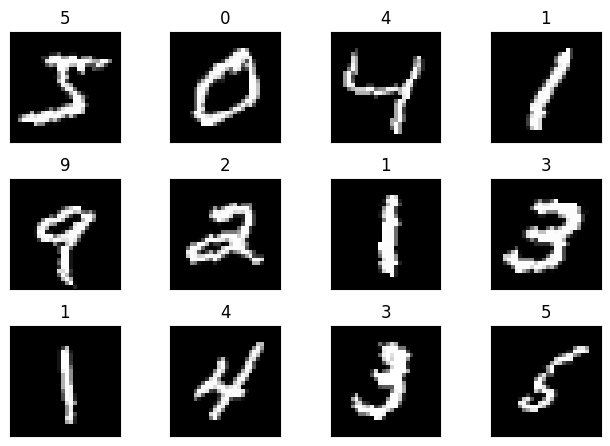

In [7]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [8]:
cnn_model = utils.send_model_to_device(model.Net, device)

In [9]:
utils.get_model_summary(cnn_model, device, x, y)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
           Dropout-4           [-1, 32, 26, 26]               0
            Conv2d-5           [-1, 16, 26, 26]             512
              ReLU-6           [-1, 16, 26, 26]               0
       BatchNorm2d-7           [-1, 16, 26, 26]              32
           Dropout-8           [-1, 16, 26, 26]               0
            Conv2d-9           [-1, 32, 24, 24]           4,608
             ReLU-10           [-1, 32, 24, 24]               0
      BatchNorm2d-11           [-1, 32, 24, 24]              64
          Dropout-12           [-1, 32, 24, 24]               0
           Conv2d-13           [-1, 16, 24, 24]             512
             ReLU-14           [-1, 16,

In [10]:
optimizer = optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)

Adjusting learning rate of group 0 to 1.0000e-02.


In [11]:
utils.run_for_epoch(20, cnn_model, device, train_loader, test_loader, optimizer, scheduler)
utils.get_model_summary(cnn_model, device, x, y)

Epoch 1


Train: Loss=0.1928 Batch_id=234 Accuracy=79.34: 100%|█| 235/235 [00:58<00:00,  4


Test set: Average loss: 0.0820, Accuracy: 9766/10000 (97.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1860 Batch_id=234 Accuracy=96.72: 100%|█| 235/235 [01:00<00:00,  3


Test set: Average loss: 0.0560, Accuracy: 9827/10000 (98.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1820 Batch_id=234 Accuracy=97.56: 100%|█| 235/235 [00:57<00:00,  4


Test set: Average loss: 0.0431, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.1642 Batch_id=234 Accuracy=97.94: 100%|█| 235/235 [01:00<00:00,  3


Test set: Average loss: 0.0378, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1445 Batch_id=234 Accuracy=98.15: 100%|█| 235/235 [01:01<00:00,  3


Test set: Average loss: 0.0359, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1332 Batch_id=234 Accuracy=98.35: 100%|█| 235/235 [00:57<00:00,  4


Test set: Average loss: 0.0332, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1505 Batch_id=234 Accuracy=98.48: 100%|█| 235/235 [01:01<00:00,  3


Test set: Average loss: 0.0330, Accuracy: 9904/10000 (99.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1546 Batch_id=234 Accuracy=98.52: 100%|█| 235/235 [01:01<00:00,  3


Test set: Average loss: 0.0284, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1443 Batch_id=234 Accuracy=98.59: 100%|█| 235/235 [01:01<00:00,  3


Test set: Average loss: 0.0312, Accuracy: 9902/10000 (99.02%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.1520 Batch_id=234 Accuracy=98.75: 100%|█| 235/235 [01:00<00:00,  3


Test set: Average loss: 0.0258, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.1476 Batch_id=234 Accuracy=98.73: 100%|█| 235/235 [01:00<00:00,  3


Test set: Average loss: 0.0293, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1273 Batch_id=234 Accuracy=98.80: 100%|█| 235/235 [01:00<00:00,  3


Test set: Average loss: 0.0257, Accuracy: 9920/10000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.1200 Batch_id=234 Accuracy=98.76: 100%|█| 235/235 [01:00<00:00,  3


Test set: Average loss: 0.0248, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.1294 Batch_id=234 Accuracy=98.78: 100%|█| 235/235 [00:58<00:00,  4


Test set: Average loss: 0.0254, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.1534 Batch_id=234 Accuracy=98.89: 100%|█| 235/235 [00:59<00:00,  3


Test set: Average loss: 0.0236, Accuracy: 9927/10000 (99.27%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.1169 Batch_id=234 Accuracy=99.00: 100%|█| 235/235 [00:58<00:00,  4


Test set: Average loss: 0.0214, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.1099 Batch_id=234 Accuracy=99.06: 100%|█| 235/235 [00:59<00:00,  3


Test set: Average loss: 0.0210, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.1205 Batch_id=234 Accuracy=99.06: 100%|█| 235/235 [00:59<00:00,  3


Test set: Average loss: 0.0208, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.1046 Batch_id=234 Accuracy=99.02: 100%|█| 235/235 [00:57<00:00,  4


Test set: Average loss: 0.0212, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.1269 Batch_id=234 Accuracy=99.11: 100%|█| 235/235 [00:58<00:00,  4


Test set: Average loss: 0.0206, Accuracy: 9937/10000 (99.37%)

Adjusting learning rate of group 0 to 1.0000e-03.
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
              ReLU-2           [-1, 32, 26, 26]               0
       BatchNorm2d-3           [-1, 32, 26, 26]              64
           Dropout-4           [-1, 32, 26, 26]               0
            Conv2d-5           [-1, 16, 26, 26]             512
              ReLU-6           [-1, 16, 26, 26]               0
       BatchNorm2d-7           [-1, 16, 26, 26]              32
           Dropout-8           [-1, 16, 26, 26]               0
            Conv2d-9           [-1, 32, 24, 24]           4,608
             ReLU-10           [-1, 32, 24, 24]               0
      BatchNorm2d-11           [-1, 32, 24, 24]              64
          Dropout-12           [-1, 32, 24, 24]       

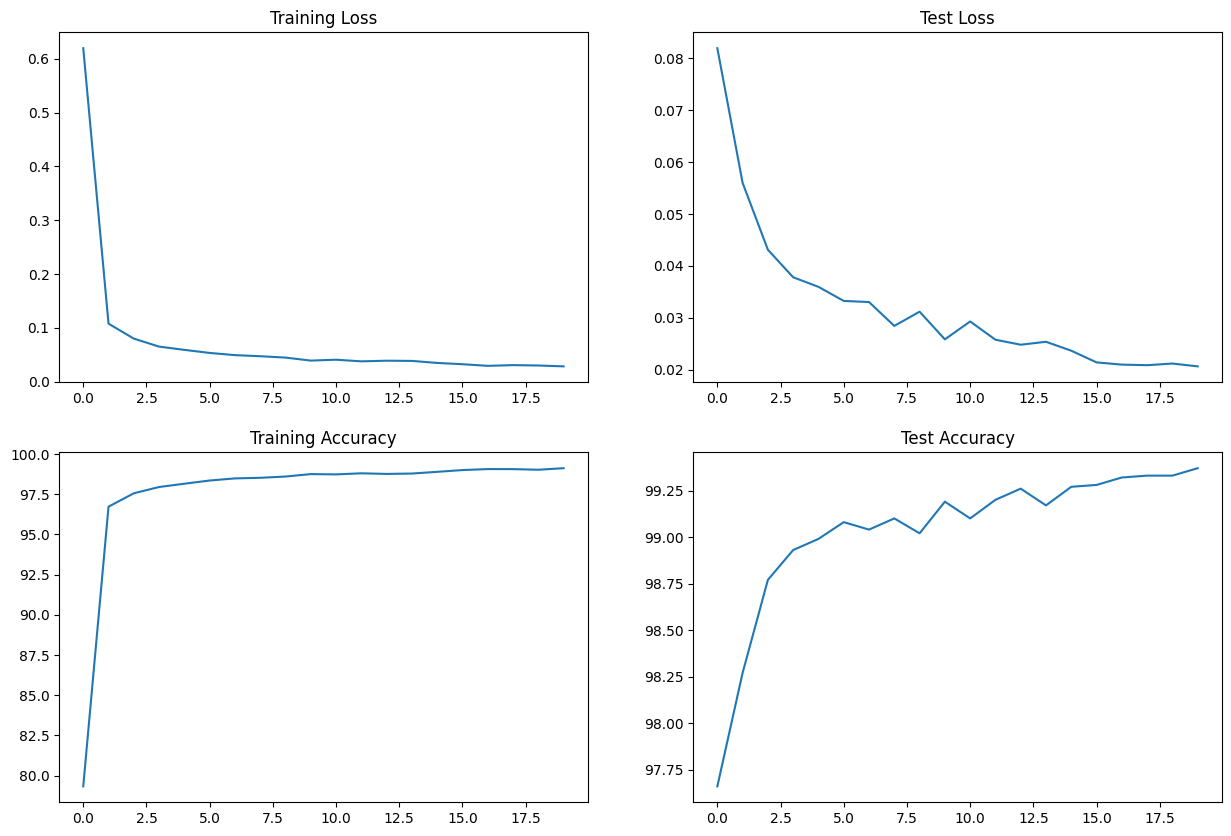

In [12]:
utils.plot_loss_accuracy_graph()